In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bz2

In [28]:
def get_labels_and_texts(file, num_records):
    labels = []
    texts = []
    with bz2.BZ2File(file) as f:
        for i, line in enumerate(f):
            x = line.decode("utf-8")
            labels.append(int(x[9]) - 1)
            texts.append(x[10:].strip())
            if i + 1 >= num_records:
                break
    return np.array(labels), texts

In [29]:
# Set the number of records to 250,000 for both training and testing
num_train = 250000
num_test = 250000

train_labels, train_texts = get_labels_and_texts('train.ft.txt.bz2', num_train)
test_labels, test_texts = get_labels_and_texts('test.ft.txt.bz2', num_test)

In [30]:
train_df=pd.DataFrame(zip(train_texts,train_labels),columns=['text','label'])
print(train_df.head())
test_df=pd.DataFrame(zip(test_texts,test_labels),columns=['text','label'])
print(test_df.head())

                                                text  label
0  Stuning even for the non-gamer: This sound tra...      1
1  The best soundtrack ever to anything.: I'm rea...      1
2  Amazing!: This soundtrack is my favorite music...      1
3  Excellent Soundtrack: I truly like this soundt...      1
4  Remember, Pull Your Jaw Off The Floor After He...      1
                                                text  label
0  Great CD: My lovely Pat has one of the GREAT v...      1
1  One of the best game music soundtracks - for a...      1
2  Batteries died within a year ...: I bought thi...      0
3  works fine, but Maha Energy is better: Check o...      1
4  Great for the non-audiophile: Reviewed quite a...      1


In [53]:

# Check for null values in the training set
train_null = train_df.isnull().sum()

# Check for null values in the test set
test_null = test_df.isnull().sum()

# Print the results
print("Null values in the training set:")
print(train_null)

print("\nNull values in the test set:")
print(test_null)

Null values in the training set:
text               0
label              0
number_of_words    0
dtype: int64

Null values in the test set:
text     0
label    0
dtype: int64


In [54]:
print(train_df.text[0])

stuning even for the nongamer this sound track was beautiful it paints the senery in your mind so well i would recomend it even to people who hate vid game music i have played the game chrono cross but out of all of the games i have ever played it has the best music it backs away from crude keyboarding and takes a fresher step with grate guitars and soulful orchestras it would impress anyone who cares to listen 


In [55]:
print(test_df.text[0])

great cd my lovely pat has one of the great voices of her generation i have listened to this cd for years and i still love it when im in a good mood it makes me feel better a bad mood just evaporates like sugar in the rain this cd just oozes life vocals are jusat stuunning and lyrics just kill one of lifes hidden gems this is a desert isle cd in my book why she never made it big is just beyond me everytime i play this no matter black white young old male female everybody says one thing "who was that singing ?"


In [56]:
import regex as re
import spacy
nlp = spacy.load('en_core_web_sm')
from nltk.tokenize import TreebankWordTokenizer
from nltk.stem.regexp import RegexpStemmer


In [57]:
def remove_special_characters(text):
  text=text.str.lower()
  text=text.apply(lambda x: re.sub(r'[0-9]+','',x))
  text=text.apply(lambda x: re.sub(r'@mention',' ',x))
  text=text.apply(lambda x: re.sub(r'https?:\/\/\S+', ' ',x))
  text=text.apply(lambda x: re.sub(r"www.\[a-z]?\.?(com)+|[a-z]+\.(com)", ' ',x))
  text=text.apply(lambda x: re.sub(r"[_\,\>\(\-:\)\\\/\!\.\^\!\:\];='#]",'',x))
  return text

In [58]:
train_df['text']=remove_special_characters(train_df['text'])
test_df['text']=remove_special_characters(test_df['text'])

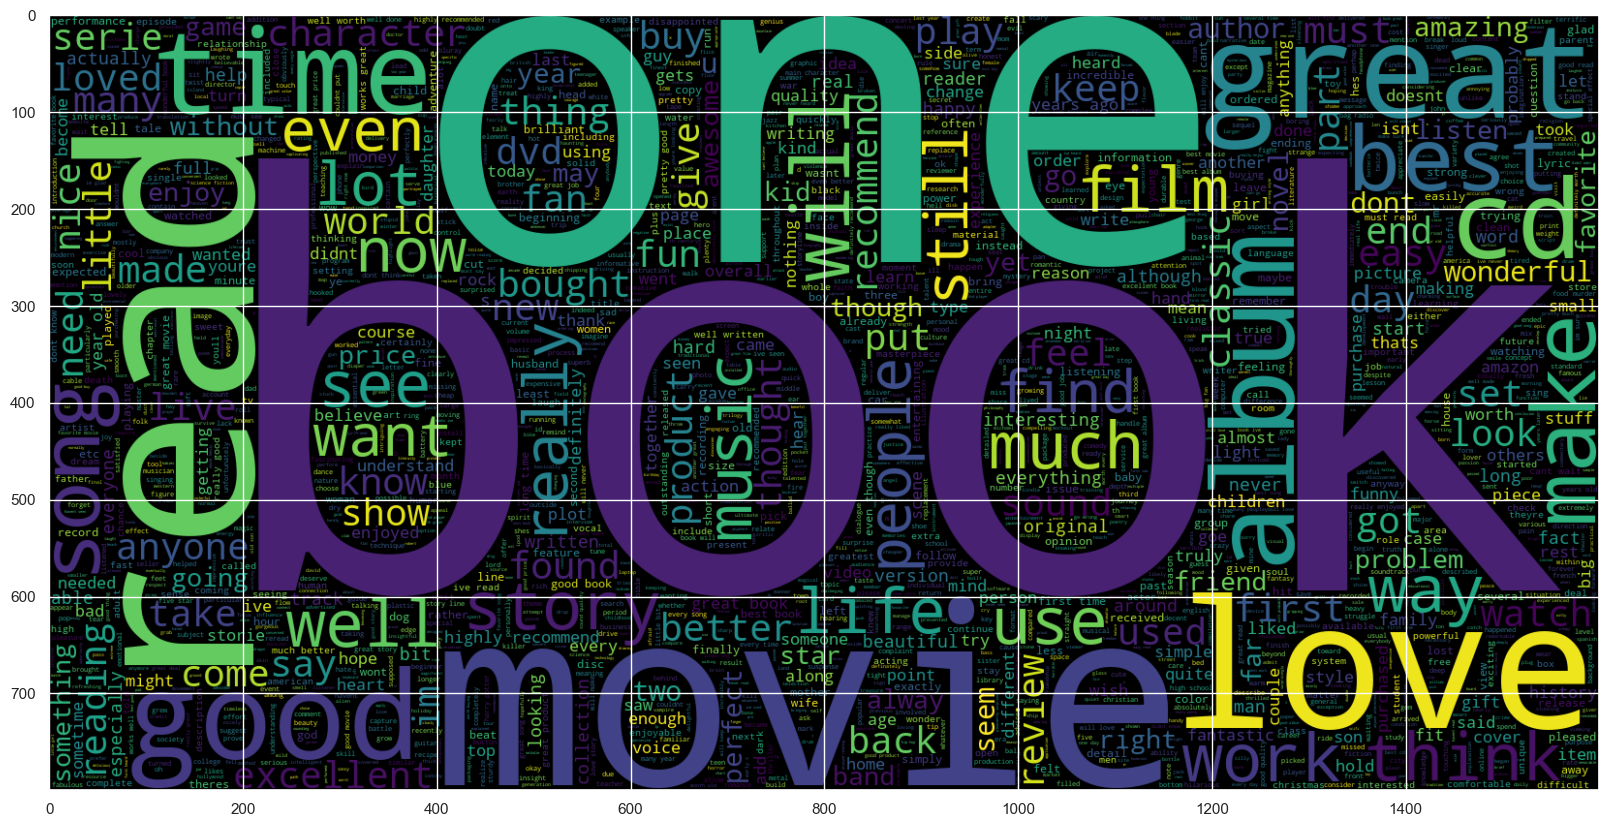

In [59]:
from wordcloud import WordCloud,STOPWORDS

plt.figure(figsize = (20,20)) # Text that is not Fake
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800 , stopwords = STOPWORDS).generate(" ".join(train_df[train_df.label == 1].text))
plt.imshow(wc , interpolation = 'bilinear')


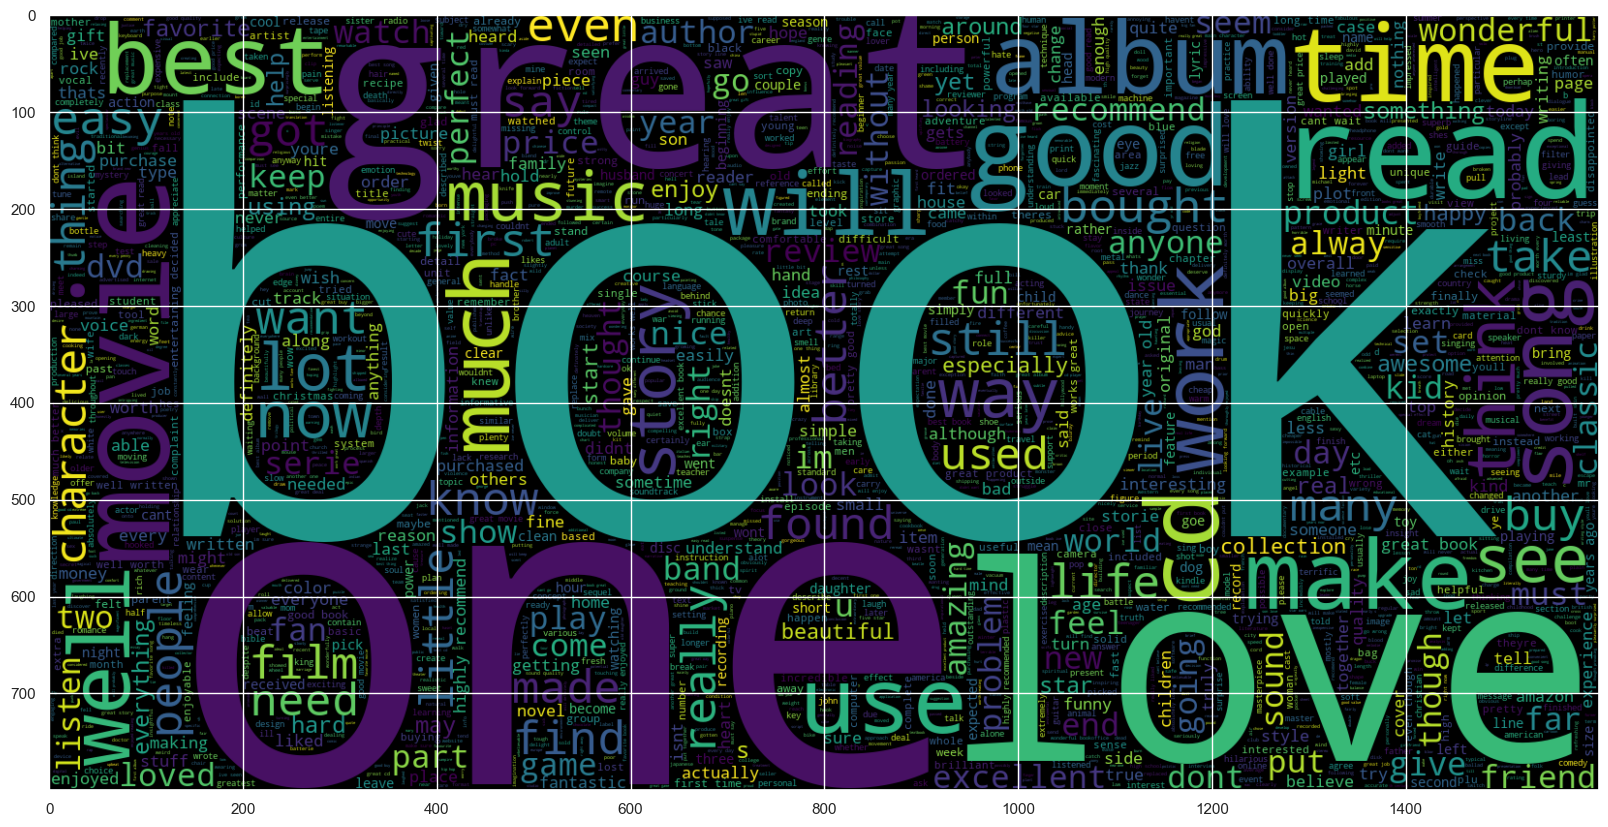

In [60]:

plt.figure(figsize = (20,20)) # Text that is not Fake
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800 , stopwords = STOPWORDS).generate(" ".join(test_df[test_df.label == 1].text))
plt.imshow(wc , interpolation = 'bilinear')

In [61]:
from collections import Counter
counter = Counter(train_df['text'])
most_common = counter.most_common(10)
most_common = dict(most_common)
most_common

{'biased reporting this book like most written and portraying hurricane katrina leads the reader to the conclusion that new orleans is the only area devastated thereby for anyones information new orleans was on the west or weak side of katrina new orleans was flooded because  elevation there is about  feet below sea level and their levy system has never been built to withstand cat  or greater storms every drop of rain that falls in new orleans has to be pumped out one way or the other if the citizens of new orleans had put more money into improving their levy system instead of the superdome they might very well be living in dry and undamaged homes today instead of morning their dead and trying to put their city back together new orleans will be rebuilt someday and i hope and pray that they have learned and benefited from this disaster and wont make the same mistakes again if you want to read and look at a balanced book coverning hurricane katrina this isnt it': 2,
 'farberware is the w

<AxesSubplot: xlabel='label', ylabel='count'>

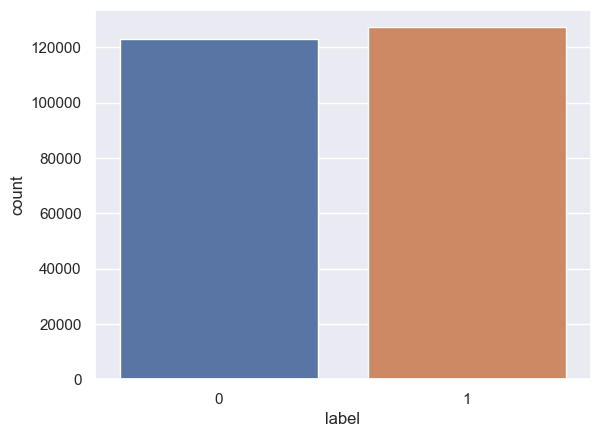

In [62]:
import seaborn as sns
sns.set(style="darkgrid")
sns.countplot(x="label", data=train_df)

<AxesSubplot: xlabel='label', ylabel='count'>

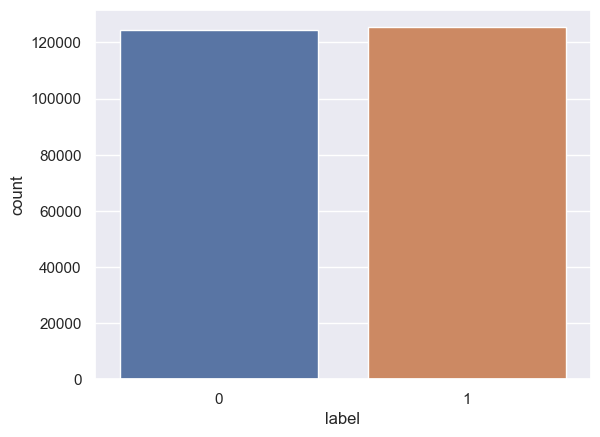

In [63]:
import seaborn as sns
sns.set(style="darkgrid")
sns.countplot(x="label", data=test_df)

In [64]:
train_df['number_of_words'] = train_df['text'].str.lower().str.split().apply(len)
train_df.head()

,text,label,number_of_words
0,stuning even for the nongamer this sound track...,1,79
1,the best soundtrack ever to anything im readin...,1,97
2,amazing this soundtrack is my favorite music o...,1,128
3,excellent soundtrack i truly like this soundtr...,1,116
4,remember pull your jaw off the floor after hea...,1,87


<AxesSubplot: ylabel='Frequency'>

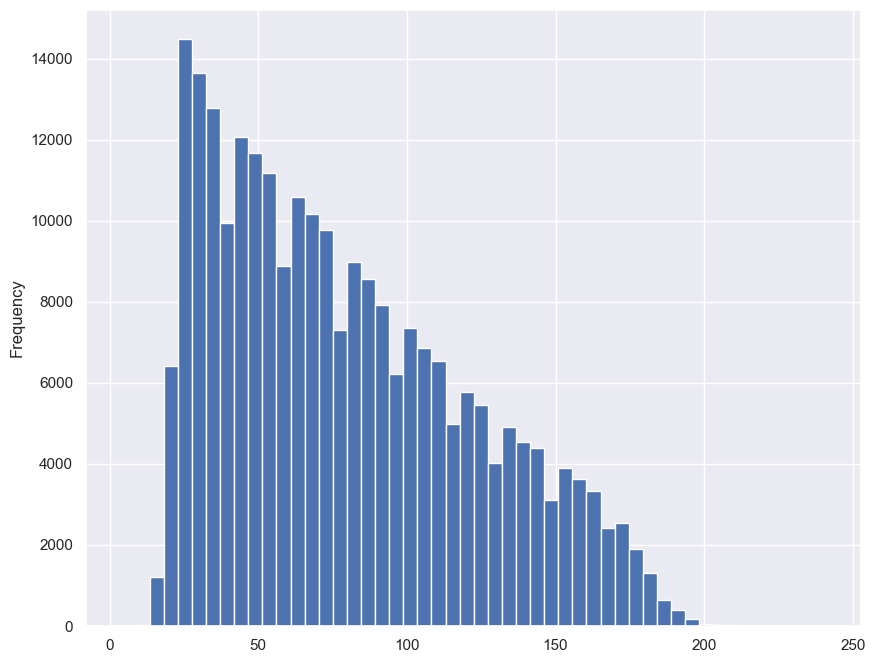

In [65]:
train_df['number_of_words'].plot(bins=50, kind='hist',figsize = (10,8)) 

array([<AxesSubplot: title={'center': '0'}>,
       <AxesSubplot: title={'center': '1'}>], dtype=object)

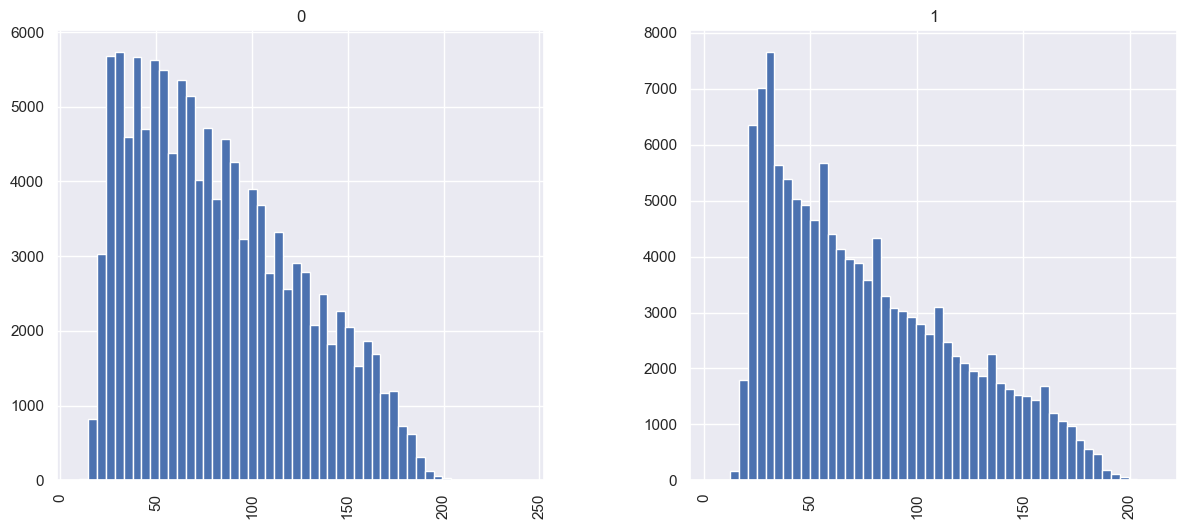

In [66]:
train_df.hist(column='number_of_words', by='label',
           bins=50,figsize=(14,6))

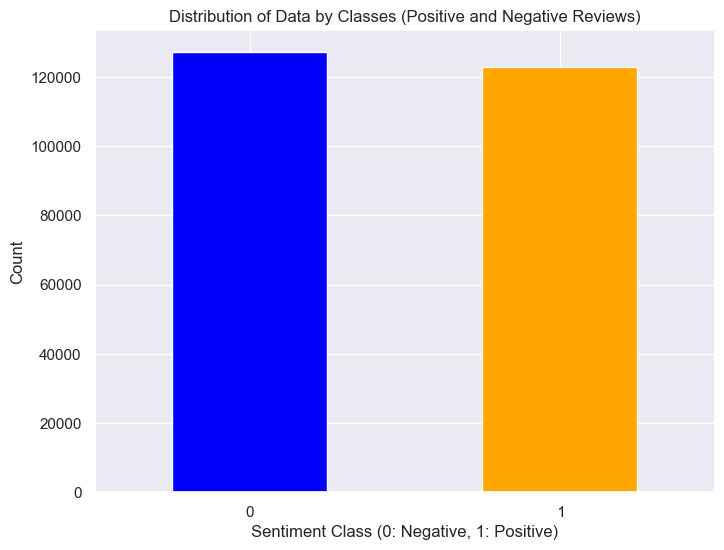

In [69]:
train_df['text'] = remove_special_characters(train_df['text'])
test_df['text'] = remove_special_characters(test_df['text'])

# Visualize Distribution of Data by Classes
plt.figure(figsize=(8, 6))
train_df['label'].value_counts().plot(kind='bar', color=['blue', 'orange'])
plt.title('Distribution of Data by Classes (Positive and Negative Reviews)')
plt.xlabel('Sentiment Class (0: Negative, 1: Positive)')
plt.ylabel('Count')
plt.xticks([0, 1], ['0', ' 1'], rotation=0)
plt.show()

Review Length Analysis

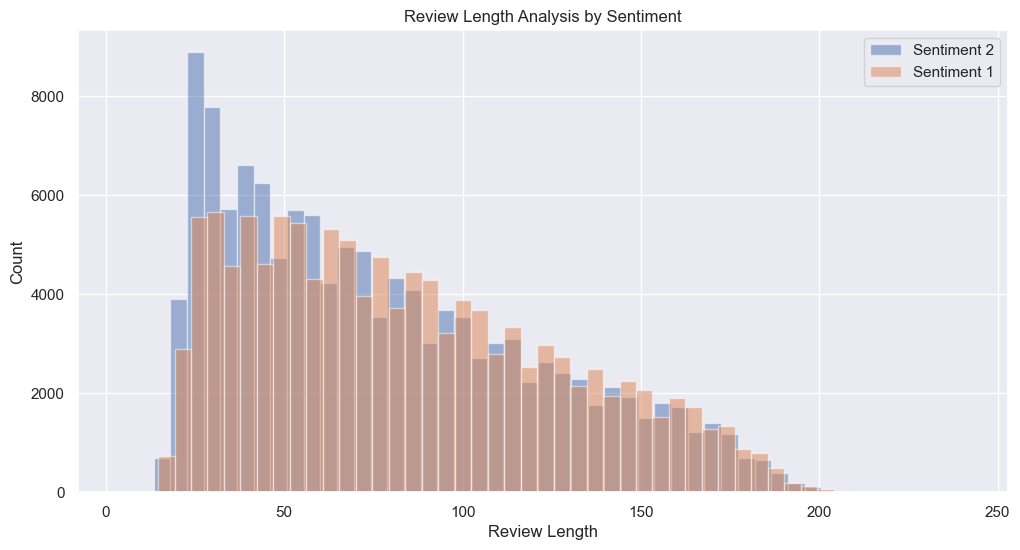

In [70]:
# Tokenize and calculate review lengths
tokenizer = TreebankWordTokenizer()
train_df['review_length'] = train_df['text'].apply(lambda x: len(tokenizer.tokenize(x)))
test_df['review_length'] = test_df['text'].apply(lambda x: len(tokenizer.tokenize(x)))

# Visualize Review Length Analysis
plt.figure(figsize=(12, 6))
for label in train_df['label'].unique():
    subset = train_df[train_df['label'] == label]
    plt.hist(subset['review_length'], bins=50, alpha=0.5, label=f'Sentiment {label + 1}')

plt.title('Review Length Analysis')
plt.xlabel('Review Length')
plt.ylabel('Count')
plt.legend()
plt.show()

Most Frequent Words Positive and Negative

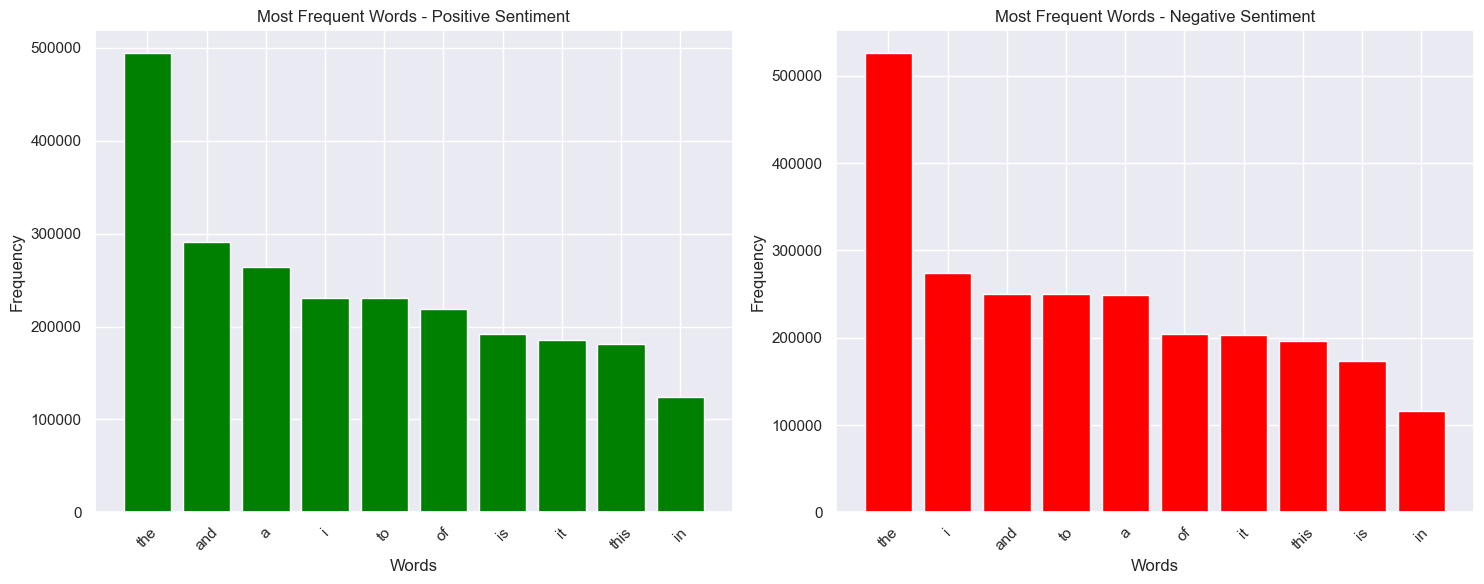

In [71]:
# Function to get most frequent words
def get_most_frequent_words(texts, num_words=10):
    all_words = ' '.join(texts)
    words = tokenizer.tokenize(all_words)
    word_counter = Counter(words)
    most_common_words = word_counter.most_common(num_words)
    return dict(most_common_words)

# Get most frequent words for positive and negative sentiments
positive_words = get_most_frequent_words(train_df[train_df['label'] == 1]['text'])
negative_words = get_most_frequent_words(train_df[train_df['label'] == 0]['text'])

# Visualize Most Frequent Words
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# Positive Sentiment
axes[0].bar(positive_words.keys(), positive_words.values(), color='green')
axes[0].set_title('Most Frequent Words - Positive Sentiment')
axes[0].set_xlabel('Words')
axes[0].set_ylabel('Frequency')
axes[0].tick_params(axis='x', rotation=45)

# Negative Sentiment
axes[1].bar(negative_words.keys(), negative_words.values(), color='red')
axes[1].set_title('Most Frequent Words - Negative Sentiment')
axes[1].set_xlabel('Words')
axes[1].set_ylabel('Frequency')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [77]:
from langdetect import detect
from langdetect.lang_detect_exception import LangDetectException

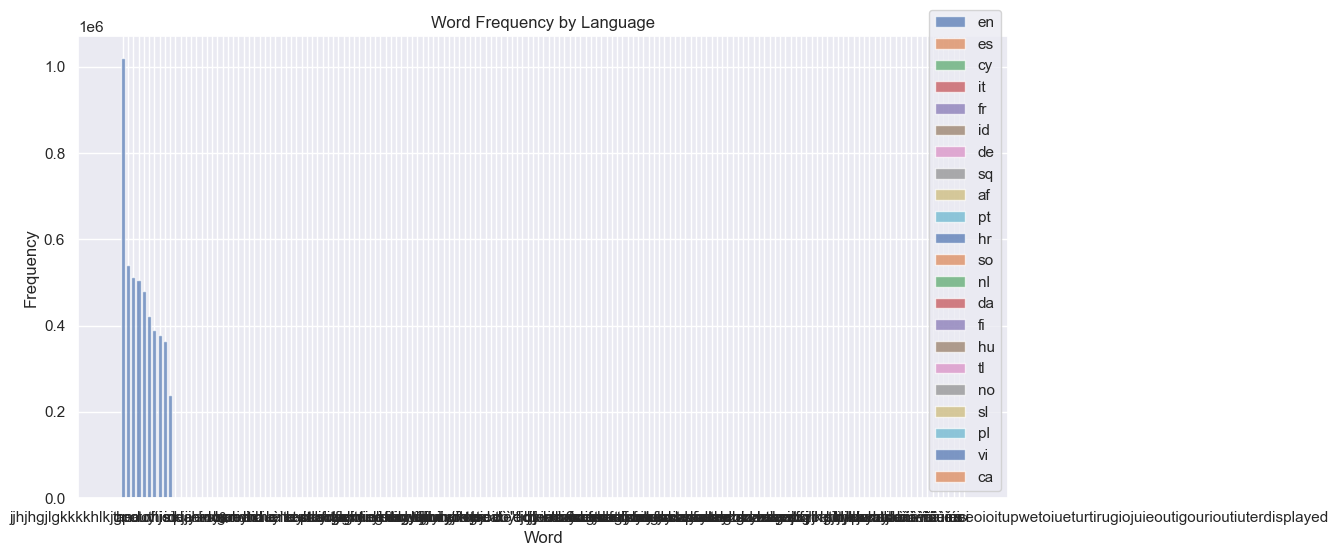

In [78]:
# Function to detect language
def detect_language(text):
    try:
        return detect(text)
    except LangDetectException:
        return 'unknown'

# Apply language detection to each review
train_df['language'] = train_df['text'].apply(detect_language)

# Function to plot word frequency by language
def plot_word_frequency_by_language(df, title):
    plt.figure(figsize=(12, 6))
    for language in df['language'].unique():
        subset = df[df['language'] == language]
        all_words = ' '.join(subset['text'])
        words = tokenizer.tokenize(all_words)
        word_counter = Counter(words)
        most_common_words = dict(word_counter.most_common(10))
        plt.bar(most_common_words.keys(), most_common_words.values(), alpha=0.7, label=language)

    plt.title(title)
    plt.xlabel('Word')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

# Visualize word frequency by language
plot_word_frequency_by_language(train_df, 'Word Frequency by Language')

In [79]:
def detect_language(text):
    try:
        return detect(text)
    except LangDetectException:
        return 'unknown'

# Apply language detection to each review
train_df['language'] = train_df['text'].apply(detect_language)

# Calculate word frequency by language
word_counts_by_language = {}
for language in train_df['language'].unique():
    subset = train_df[train_df['language'] == language]
    all_words = ' '.join(subset['text'])
    words = tokenizer.tokenize(all_words)
    word_counter = Counter(words)
    word_counts_by_language[language] = sum(word_counter.values())

# Identify the language with the highest count
max_language = max(word_counts_by_language, key=word_counts_by_language.get)

# Display the result
print(f"The language with the highest word count is '{max_language}' with {word_counts_by_language[max_language]} words.")

The language with the highest word count is 'en' with 20077039 words.


Language frequency in the training set:
English       249463
Espanol          406
French            38
Portuguese        23
Afrikaans         12
Italian           11
German            10
Other              9
Dutch              8
Somali             4
Danish             4
Croatian           3
Hungarian          3
Indonesian         2
Welsh              2
Albanian           1
Finnish            1
Name: language_label, dtype: int64

Language frequency in the test set:
English       249361
Espanol          489
French            56
Portuguese        19
Other             19
Italian           13
German            10
Somali             7
Dutch              7
Welsh              6
Afrikaans          5
Indonesian         3
Danish             2
Hungarian          1
Croatian           1
Albanian           1
Name: language_label, dtype: int64


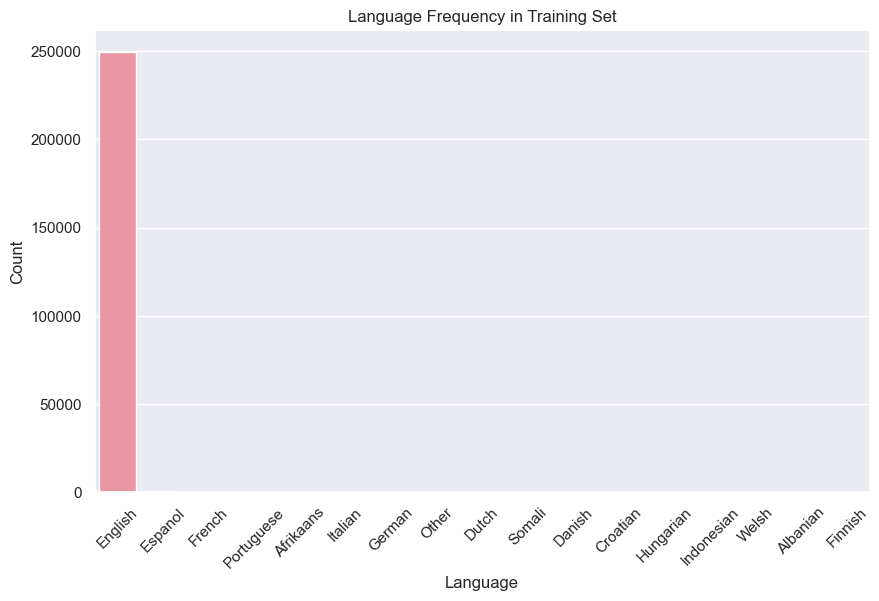

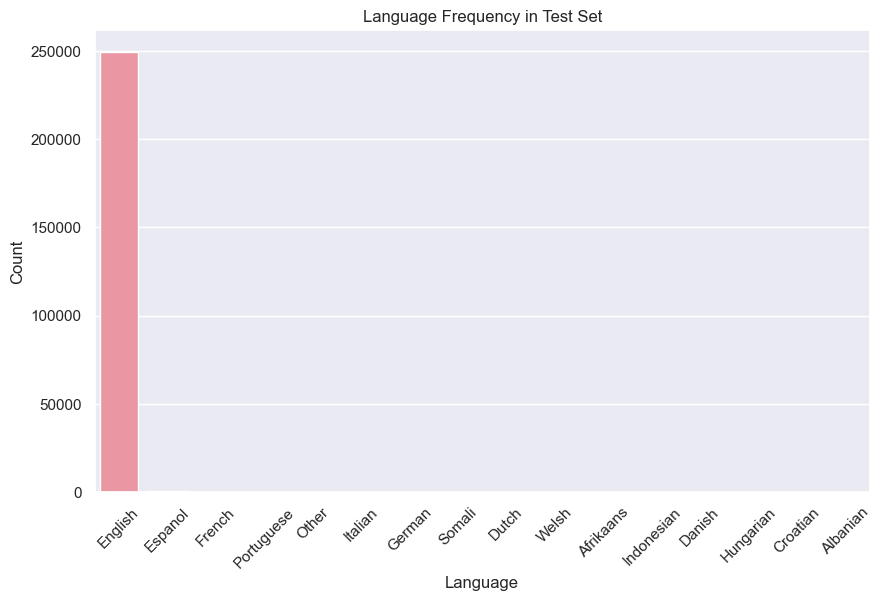

In [80]:
def map_language_label(language_code):
    language_mapping = {
        'en': 'English',
        'es': 'Espanol',
        'fr': 'French',
        'it': 'Italian',
        'af': 'Afrikaans',
        'pt': 'Portuguese',
        'de': 'German',
        'nl': 'Dutch',
        'cy': 'Welsh',
        'hr': 'Croatian',
        'so': 'Somali',
        'id': 'Indonesian',
        'sq': 'Albanian',
        'da': 'Danish',
        'fi': 'Finnish',
        'hu': 'Hungarian',
        # Add more language codes and labels as needed
    }
    return language_mapping.get(language_code, 'Other')

# Function to detect language
def detect_language(text):
    try:
        return detect(text)
    except:
        return 'unknown'

# Apply language detection to the training and test datasets
train_df['language'] = train_df['text'].apply(detect_language)
test_df['language'] = test_df['text'].apply(detect_language)

# Map language codes to labels
train_df['language_label'] = train_df['language'].apply(map_language_label)
test_df['language_label'] =test_df['language'].apply(map_language_label)

# Count the frequency of each language
language_counts_train = train_df['language_label'].value_counts()
language_counts_test = test_df['language_label'].value_counts()

# Display language frequency
print("Language frequency in the training set:")
print(language_counts_train)

print("\nLanguage frequency in the test set:")
print(language_counts_test)

# Visualize language frequency
plt.figure(figsize=(10, 6))
sns.barplot(x=language_counts_train.index, y=language_counts_train.values)
plt.title('Language Frequency in Training Set')
plt.xlabel('Language')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x=language_counts_test.index, y=language_counts_test.values)
plt.title('Language Frequency in Test Set')
plt.xlabel('Language')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()